In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("quikr_car - quikr_car.csv")

In [3]:
print(df.shape)
df.head()

(892, 6)


,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,"80,000","45,000 kms",Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,"4,25,000",40 kms,Diesel
2,Maruti Suzuki Alto 800 Vxi,Maruti,2018,Ask For Price,"22,000 kms",Petrol
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,"3,25,000","28,000 kms",Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,"5,75,000","36,000 kms",Diesel


In [4]:
df.isnull().sum()

name           0
company        0
year           0
Price          0
kms_driven    52
fuel_type     55
dtype: int64

In [5]:
df['Price'].replace({'Ask For Price':np.nan}, inplace=True)

In [6]:
df['company'].value_counts()

Maruti        235
Hyundai       145
Mahindra      100
Tata           74
Honda          61
Toyota         39
Chevrolet      35
Renault        34
Ford           31
Volkswagen     20
Skoda          13
Audi           11
Datsun          8
Mini            8
BMW             8
Nissan          6
Mitsubishi      6
Commercial      6
Mercedes        6
Fiat            4
Force           4
Hindustan       3
I               3
tata            3
Jaguar          2
MARUTI          2
urgent          2
Sale            2
Used            2
Well            1
TATA            1
Tara            1
Any             1
i               1
very            1
Jeep            1
2012            1
Yamaha          1
sell            1
scratch         1
Volvo           1
Land            1
7               1
Swift           1
9               1
selling         1
URJENT          1
all             1
Name: company, dtype: int64

In [7]:
df['company'].replace({'tata':'Tata','MARUTI':'Maruti','TATA':'Tata','Tara':'Tata','Swift':'Maruti'}, inplace=True)

In [8]:
cars = np.array(df['company'].value_counts().index)

In [9]:
cars

array(['Maruti', 'Hyundai', 'Mahindra', 'Tata', 'Honda', 'Toyota',
       'Chevrolet', 'Renault', 'Ford', 'Volkswagen', 'Skoda', 'Audi',
       'Mini', 'BMW', 'Datsun', 'Mitsubishi', 'Nissan', 'Commercial',
       'Mercedes', 'Force', 'Fiat', 'I', 'Hindustan', 'Jaguar', 'urgent',
       'Used', 'Sale', 'Well', 'Yamaha', 'URJENT', 'Any', 'i', 'very',
       'Jeep', 'Volvo', 'sell', '2012', 'Land', '9', 'selling', '7',
       'scratch', 'all'], dtype=object)

In [10]:
cars = cars[(cars!='Commercial') & (cars!='I') & (cars!='Sale') & (cars!='urgent') & (cars!='Used') & (cars!='2012') & (cars!='URJENT') & (cars!='Any') & (cars!='9') & (cars!='Well') & (cars!='i') & (cars!='scratch') & (cars!='all') & (cars!='sell') & (cars!='7') & (cars!='selling') & (cars!='very')]

In [11]:
df[~df['company'].isin(cars)]

,name,company,year,Price,kms_driven,fuel_type
69,I want to sell my car Tata Zest,I,2017,NaN,NaN,NaN
85,I want to sell my car Tata Zest,I,2017,NaN,NaN,NaN
185,"Commercial , DZire LDI, 2016, for sale",Commercial,...,NaN,NaN,NaN
286,"Commercial , DZire LDI, 2016, for sale",Commercial,...,NaN,NaN,NaN
360,selling car Ta,selling,Zest,NaN,NaN,NaN
401,URJE,URJENT,SELL,"1,80,000",NaN,NaN
441,Used Commercial Maruti Omn,Used,arry,"1,50,000",NaN,NaN
593,Commercial Chevrolet Sail Hatchback ca,Commercial,o...,"2,25,000",NaN,NaN
599,Commercial Car Ta,Commercial,Zest,"3,71,500",NaN,NaN
614,Used bt new conditions ta,Used,Zest,"2,55,000",NaN,NaN


In [12]:
def clean_company(d):
    name = d.to_numpy()[0]
    company = d.to_numpy()[1]
    if company not in cars:
        for i in name.split():
            if i in cars:
                d.to_numpy()[1] = i
    return d

In [13]:
df = df.apply(clean_company,axis=1)

In [14]:
df = df[df['company'].isin(cars)]

In [15]:
def str_to_num(val):
    if val is not np.nan:
        num = ''
        for i in val:
            if i.isnumeric():
                num += i
        if len(num)>0:
            return int(num)
        else:
            return np.nan
    else:
        return val

In [16]:
df['kms_driven'] = df['kms_driven'].apply(str_to_num)

In [17]:
df['Price'] = df['Price'].apply(str_to_num)

In [18]:
df['year'] = df['year'].apply(str_to_num)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 877 entries, 0 to 891
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   name        877 non-null    object 
 1   company     877 non-null    object 
 2   year        847 non-null    float64
 3   Price       847 non-null    float64
 4   kms_driven  838 non-null    float64
 5   fuel_type   837 non-null    object 
dtypes: float64(3), object(3)
memory usage: 48.0+ KB


In [20]:
df['fuel_type'] = df['fuel_type'].astype('category')

In [21]:
df['year'].value_counts().tail()

1995.0    2
2.0       2
4.0       1
15.0      1
150.0     1
Name: year, dtype: int64

In [22]:
df['year'].replace({2.0:np.nan, 4.0:np.nan, 15.0:np.nan, 150.0:np.nan}, inplace=True)

In [23]:
def clean_name(name):
    flag = False
    for i in name.split():
        if i in cars:
            flag = True
    if flag:
        new_name = ''
        name = name.split()[:3]
        new_name = " ".join(name)
        return new_name
    else:
        return np.nan

In [24]:
df['name'] = df['name'].apply(clean_name)

In [25]:
list(set(df[df['company']=='Mahindra']['name'].values))[-9]

'urgent sell my'

In [26]:
df.isnull().sum()

name          11
company        0
year          35
Price         30
kms_driven    39
fuel_type     40
dtype: int64

In [27]:
df.dropna(subset=['name'], inplace=True)

In [28]:
df['name'] = df['name'].apply(clean_name)

In [29]:
df.dropna(subset=['name'], inplace=True)

In [30]:
df.isnull().sum()

name           0
company        0
year          22
Price         25
kms_driven    24
fuel_type     25
dtype: int64

In [31]:
df.shape

(862, 6)

In [32]:
(25/862)*100

2.9002320185614847

In [33]:
df.dropna(subset=['fuel_type'], inplace=True)

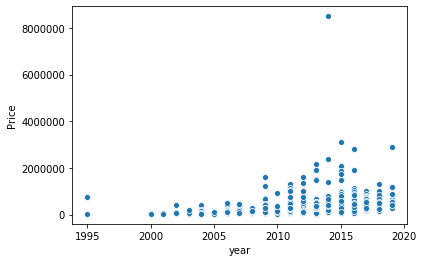

In [34]:
sns.scatterplot(df['year'],df['Price'])

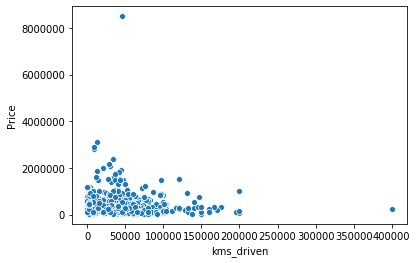

In [35]:
sns.scatterplot(df['kms_driven'],df['Price'])

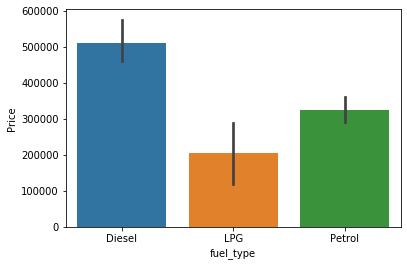

In [36]:
sns.barplot(df['fuel_type'],df['Price'])

In [37]:
df.groupby('name').mean()['Price'].reset_index()

,name,Price
0,Audi A3 Cabriolet,3.100000e+06
1,Audi A4 1.8,6.990000e+05
2,Audi A4 2.0,1.586667e+06
3,Audi A6 2.0,1.599000e+06
4,Audi A8,1.000000e+06
...,...,...
253,Volkswagen Polo Trendline,3.500000e+05
254,Volkswagen Vento Comfortline,2.200000e+05
255,Volkswagen Vento Highline,8.750000e+05
256,Volkswagen Vento Konekt,2.450000e+05


In [38]:
df[df['Price'].isna()]

,name,company,year,Price,kms_driven,fuel_type
2,Maruti Suzuki Alto,Maruti,2018.0,NaN,22000.0,Petrol
5,Ford EcoSport Titanium,Ford,2015.0,NaN,59000.0,Diesel
138,Maruti Suzuki Alto,Maruti,2018.0,NaN,28028.0,Petrol
295,Maruti Suzuki Swift,Maruti,2010.0,NaN,52000.0,Diesel
304,Tata Indica eV2,Tata,2017.0,NaN,84000.0,Diesel
388,Maruti Suzuki Alto,Maruti,2018.0,NaN,24000.0,Petrol
449,Maruti Suzuki Zen,Maruti,2011.0,NaN,16000.0,Petrol
503,Hyundai Xcent Base,Hyundai,2015.0,NaN,180000.0,Diesel
511,Hyundai Xcent S,Hyundai,2015.0,NaN,35000.0,Petrol
524,Toyota Innova 2.0,Toyota,2009.0,NaN,15574.0,Diesel


In [39]:
df.isnull().sum()

name           0
company        0
year           0
Price         21
kms_driven     0
fuel_type      0
dtype: int64

In [40]:
df.dropna(subset=['Price'],inplace=True)

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 816 entries, 0 to 889
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   name        816 non-null    object  
 1   company     816 non-null    object  
 2   year        816 non-null    float64 
 3   Price       816 non-null    float64 
 4   kms_driven  816 non-null    float64 
 5   fuel_type   816 non-null    category
dtypes: category(1), float64(3), object(2)
memory usage: 39.1+ KB


In [42]:
df['year'] = df['year'].astype('int')
df['Price'] = df['Price'].astype('int')
df['kms_driven'] = df['kms_driven'].astype('int')

In [43]:
df.isnull().sum()

name          0
company       0
year          0
Price         0
kms_driven    0
fuel_type     0
dtype: int64

In [44]:
df['company'].value_counts()

Maruti        221
Hyundai       139
Mahindra       98
Tata           65
Honda          60
Toyota         36
Chevrolet      34
Renault        33
Ford           30
Volkswagen     19
Skoda          13
Audi           11
BMW             8
Mini            8
Datsun          7
Nissan          6
Mitsubishi      6
Mercedes        6
Force           4
Fiat            4
Hindustan       3
Jaguar          2
Volvo           1
Land            1
Jeep            1
Name: company, dtype: int64

In [45]:
df.sample(5)

,name,company,year,Price,kms_driven,fuel_type
156,Maruti Suzuki Alto,Maruti,2018,310000,3000,Petrol
204,Maruti Suzuki Swift,Maruti,2006,135000,45000,Petrol
187,Fiat Petra ELX,Fiat,2008,75000,65000,Petrol
200,Maruti Suzuki Wagon,Maruti,2011,210000,35000,Petrol
399,Mercedes Benz C,Mercedes,2002,399000,41000,Petrol


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 816 entries, 0 to 889
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   name        816 non-null    object  
 1   company     816 non-null    object  
 2   year        816 non-null    int32   
 3   Price       816 non-null    int32   
 4   kms_driven  816 non-null    int32   
 5   fuel_type   816 non-null    category
dtypes: category(1), int32(3), object(2)
memory usage: 29.6+ KB


In [47]:
df['company'] = df['company'].astype('category')
df['name'] = df['name'].astype('category')

In [48]:
df.to_csv('quikr_data.csv', index=False)

In [49]:
mean_model = df.groupby('name').mean()['Price']
df['name'] = df['name'].map(mean_model)

In [50]:
mean_company = df.groupby('company').mean()['Price']
df['company'] = df['company'].map(mean_company)

In [51]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

In [52]:
X = df.iloc[:,[0,1,2,4,5]]

In [53]:
y = df['Price']

In [54]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(handle_unknown='ignore')

In [55]:
from sklearn.compose import make_column_transformer
column_trans = make_column_transformer((ohe, ['fuel_type']), remainder='passthrough')

In [56]:
from sklearn.pipeline import make_pipeline
pipe = make_pipeline(column_trans, reg)

In [57]:
pipe.fit(X,y)

Pipeline(memory=None,
         steps=[('columntransformer',
                 ColumnTransformer(n_jobs=None, remainder='passthrough',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories='auto',
                                                                drop=None,
                                                                dtype=<class 'numpy.float64'>,
                                                                handle_unknown='ignore',
                                                                sparse=True),
                                                  ['fuel_type'])],
                                   verbose=False)),
                ('linearregression',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                          

In [58]:
new_x = X.sample(1)

In [59]:
pipe.predict(new_x)[0]

228874.10831533372

In [60]:
new_x

,name,company,year,kms_driven,fuel_type
22,205190.47619,269837.552036,2015,39000,Petrol


In [61]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [62]:
pipe.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('columntransformer',
                 ColumnTransformer(n_jobs=None, remainder='passthrough',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories='auto',
                                                                drop=None,
                                                                dtype=<class 'numpy.float64'>,
                                                                handle_unknown='ignore',
                                                                sparse=True),
                                                  ['fuel_type'])],
                                   verbose=False)),
                ('linearregression',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                          

In [63]:
y_pred = pipe.predict(X_test)

In [64]:
from sklearn.metrics import r2_score

In [65]:
r2_score(y_test,y_pred)

0.9438989034479656